# Predicting Heart Disease using Machine Learning

### 1. Problem Definition
The goal of this problem is to explore **binary classification** (a sample can only be one of two things) on heart disease data.

This is because we're going to be using a number of different **features** about a person to predict whether they have heart disease or not.

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

We're going 

### 2. Data
The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) through the UCI Machine Learning Repository.

However, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database is comprised of 76 attributes, but for this analysis, only 14 attributes will be used. These **Atributes/Features** are the variables that will be used to predict the **target variable**.

The **indpendent variables** in this data are the different medical attributes, and the **dependent variable** is whether or not they have heart disease.

### 3. Evaluation
> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll purpuse this project.

### 4. Features

#### 4.1 Heart Disease Data Dictionary
The following are the features used to predict the target variable (heart disease or not heart disease):
* **1. age** - age in years
* **2. sex** - (1 = male; 0 = female)
* **3. cp** - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* **4. trestbps** - resting blood presrue (in mm Hg on admission to the hospital)
    * anyhting above 130-140 is typically cause for concern
* **5. chol** - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* **6. fbs** - (fasting blood sugar > 120 mg/dl)(1 = true; 0 = false)
    * '126' mg/dL signals diabetes
* **7. restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mid symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
* **8. thalach** - maximum heart rate achieved
* **9. exang** - exercise induced angina (1 = yes; 0 = no)
* **10. oldpeak** - ST depression induced by exercise relative to rest
    * looks at stress of heart during exercise
    * unhealthy heart will stress more
* **11. slope** - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* **12. ca** - number of major vessels (0-3) colored by flourospy
    * colored vessel means that doctor can see the blood passing through
    * the more blood movement at the better (no clots)
* **13. thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when exercising
* **14. target** - have heart disease or not (1 = yes, 0 = no) (= the predicted attribute)

### 5. Preparing the Tools 

In [108]:
# Importing EDA and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plots should appear in the notebook
%matplotlib inline 
import seaborn as sns 

# Visualization themes & styles
plt.style.use('ggplot')
sns.set_theme(style = "darkgrid", palette = "pastel")

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Classification Model Evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### 6. Load Data

In [3]:
df = pd.read_csv("heart-disease.csv")

### 7. Exploratory Data Analysis (EDA)
EDA Template that will be followed for this problem:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and what are the different types of data present?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and are they something to be concerned about?
5. How can you add, change or remove features to get more out of your data?

#### 7.1 Data Description

In [4]:
# Top 10 rows of dataframe
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
# Shape of dataframe
print(df.shape)

(303, 14)


This dataset contains 303 observations/patients (rows) and each observation/patient is accompanied with 14 patient attributes/indictators (columns) about them that are related to heart disease. 

#### 7.2 Descriptive Statistics

In [6]:
# Data type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Number of unique values in each column
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index = ["# of Unique Values:"]).transpose()

,# of Unique Values:
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [8]:
# Number of postive (1) and negative (0) samples in the dataset
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are clost to even, the `target` column can be considered **balanced** rather than **unbalanced**. 

In [9]:
# Normalized value counts (percentages)
df.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

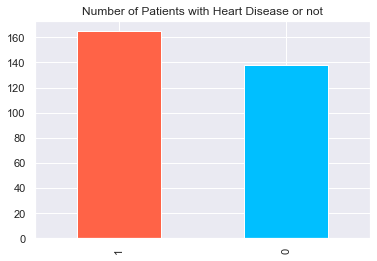

In [10]:
# Plot the value counts with a bar graph
df.target.value_counts().plot(kind = "bar", color = ["tomato", "deepskyblue"], title = "Number of Patients with Heart Disease or not");

In [11]:
# Seperating the columns into categorical and continuous features
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_col = ['output']
print("The categorical features are:", categorical_cols)
print("The continuous features are:", continuous_cols)
print("The target variable is: ", target_col)

The categorical features are: ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
The continuous features are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The target variable is:  ['output']


In [12]:
# Summary Statistics
df[continuous_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### 7.3 Handling Missing Values & Duplicates

In [13]:
# Number of Missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are **no missing values** in this dataset!

In [14]:
# Number of Duplicates
duplicates_number = df.duplicated().sum()
print("Number of duplicated rows is: ", duplicates_number)

Number of duplicated rows is:  1


In [15]:
# Drop the duplicate value
df = df.drop_duplicates(keep = "first")

#### Heart Disease Frequency according to Gender

In [16]:
# Number of male and female observation
df.sex.value_counts()

1    206
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,92


**Basic Inference**: There are a total of 96 female patients in this dataset, and 72 of them are positive for heart disease. There is approximately a 75% chance that a female patient that participates in this dataset has heart disease.

As for males, there are 206 male patients in this datasst, and 114 of them have heart disease, which implies that there is less than a 50% chance that a male patient partaking in this study will have heart disease. 

There is roughly a 54% chance that a patient partaking in this dataset has a heart disease based on no other parameters. This will be used as **basic baseline** to surpass with machine learning modelling. 

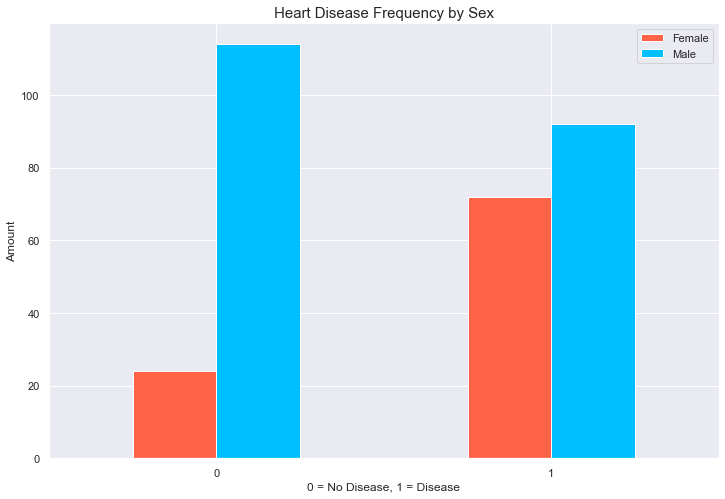

In [276]:
# Visualizing heart disease based on gender
pd.crosstab(df.target, df.sex).plot(kind = "bar", figsize = (12, 8), color = ["tomato", "deepskyblue"])

# Adding plot attributes
plt.title("Heart Disease Frequency by Sex", fontsize = 15)
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0); # Keep the labels on the x-axis vertical

#### Age vs. Max Heart Rate for Heart Disease

Let's compare some indepedent variables (features), such as, `age` and `thalach` (maximum heart rate) and then comparing them to our targert variable, `heart disease`.
Because the `age` and `thalach` are continuous, we'll use a scatter plot.`

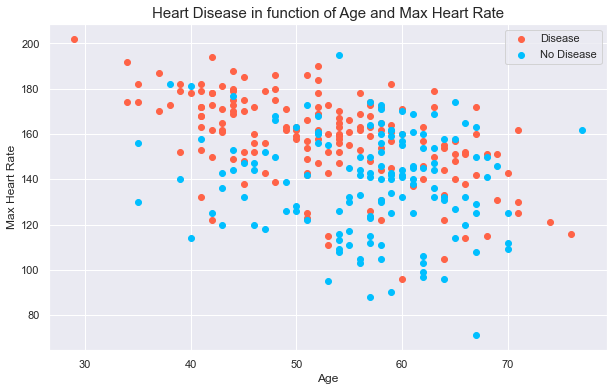

In [275]:
# Create plot figure
plt.figure(figsize = (10, 6))

# Plot patients who tested postive for heart disease
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target == 1],
           c = "tomato") # define the graph as as a scatter plot

# Plot patients who tested negative for heart disease
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "deepskyblue")

# Adding plot attributes
plt.title("Heart Disease in function of Age and Max Heart Rate", fontsize = 15)
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

**Inference:** Younger individuals tend to have a higher max heart rate (more dots on the left side of the graph), and the older someone is, the lower their max heart rate is. There also seems to be less heart disease patients in the older age range (around 55+). This is likely because a large portion of the data is collected on older patients (50+ years of age). 

Let's check the **distribution** of the age variable to verify.

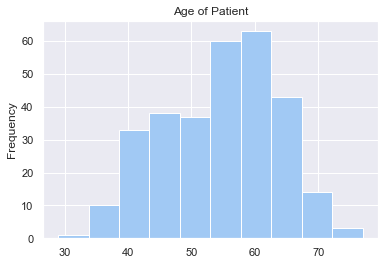

In [274]:
# Histogram of age feature
df.age.plot.hist(title = "Age of Patient");

The distribution of the age variable appears to be somewhat normal with a slight skew to the left, which reflects in the scatter plot made above.

#### Heart Disease Frequency per Chest Pain Type
Here, we will compare the `cp` (chest pain) feature to heart disease frequency as it is a common symptom of heart disease patients.

In [21]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,68
3,7,16


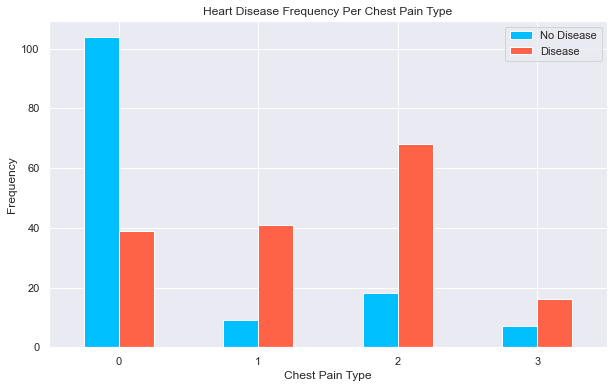

In [22]:
# Bar plot of chest pain type vs. heart disease frequency
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (10, 6),
                                  color = ["deepskyblue", "tomato"])

# Adding plot attributes
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0); # x-values on graph should not appear rotated sideways

**Inference:**
Understanding the different levels chest pain through the data dictionary defined at the start of the analysis:
1. cp - chest pain type
 * 0: Typical angina: chest pain related to decreased blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophagael spasm (non-heart related)
 * 3: Asymptomatic: chest pain not showing signs of disease
 
It seems that atypical agina (value 1) is said to be chest pain not related to the heart, however, there appears to be a higher ratio of patients with heart disease than patients without it. A similar pattern is seen with non-anginal pain, which is typically a non-heart related esophagael spasm. 

Upon doing some additional research on **atypical agina**, according to PubMed, it seems [even medical professionals are not able to comprehend them]("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2763472/"). 
> Today, 23 years later, “atypical chest pain” is still popular in medical circles. Its meaning, however, remains unclear. A few articles have the term in their title, but do not define or discuss it in their text. In other articles, the term refers to noncardiac causes of chest pain.

We will continue to explore our variables and try to understand the influence of chest pain on heart disease patients. 

### 8. Data Visualizations
#### 8.1 Univariate Data Visualizations

##### Bar Plots for Categorical Features

                                             Bar Graphs for Categorical Features:                                            
                                               _______________________________                                               


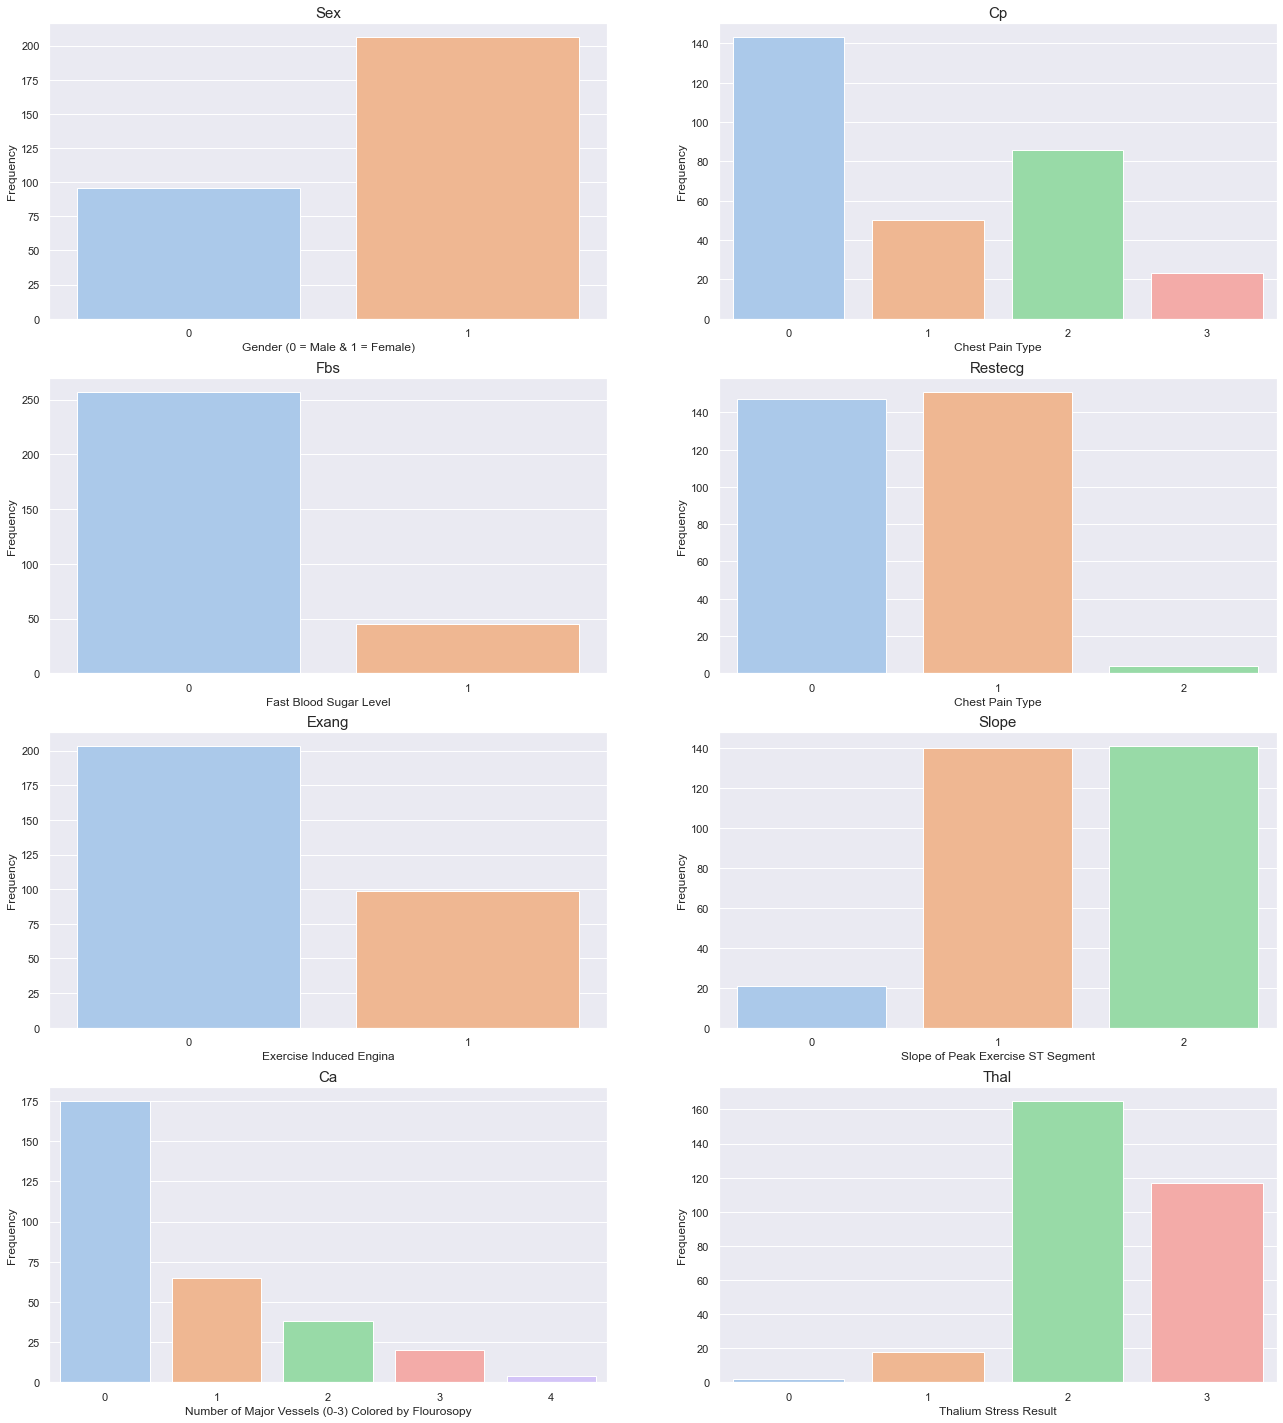

In [271]:
# Title for all bar graphs
title_all_graphs = "Bar Graphs for Categorical Features:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Bar plots for the categorical features
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(nrows = 4,
                                                                           ncols = 2,
                                                                           figsize = (22, 25))

# sex (bar plot)
sns.countplot(ax = ax0, data = df, x = 'sex')
ax0.set_title("Sex", fontsize = 15)
ax0.set_xlabel("Gender (0 = Male & 1 = Female)")
ax0.set_ylabel("Frequency")

# cp (bar plot)
sns.countplot(ax = ax1, data = df, x = 'cp')
ax1.set_title("Cp", fontsize = 15)
ax1.set_xlabel("Chest Pain Type")
ax1.set_ylabel("Frequency")

# fbs (bar plot)
sns.countplot(ax = ax2, data = df, x = 'fbs')
ax2.set_title("Fbs", fontsize = 15)
ax2.set_xlabel("Fast Blood Sugar Level")
ax2.set_ylabel("Frequency")

# restecg (bar plot)
sns.countplot(ax = ax3, data = df, x = 'restecg')
ax3.set_title("Restecg", fontsize = 15)
ax3.set_xlabel("Chest Pain Type")
ax3.set_ylabel("Frequency")

# exang (bar plot)
sns.countplot(ax = ax4, data = df, x = 'exang')
ax4.set_title("Exang", fontsize = 15)
ax4.set_xlabel("Exercise Induced Engina")
ax4.set_ylabel("Frequency")

# slope (bar plot)
sns.countplot(ax = ax5, data = df, x = 'slope')
ax5.set_title("Slope", fontsize = 15)
ax5.set_xlabel("Slope of Peak Exercise ST Segment")
ax5.set_ylabel("Frequency")

# ca (bar plot)
sns.countplot(ax = ax6, data = df, x = 'ca')
ax6.set_title("Ca", fontsize = 15)
ax6.set_xlabel("Number of Major Vessels (0-3) Colored by Flourosopy")
ax6.set_ylabel("Frequency")

# thal (bar plot)
sns.countplot(ax = ax7, data = df, x = 'thal')
ax7.set_title("Thal", fontsize = 15)
ax7.set_xlabel("Thalium Stress Result")
ax7.set_ylabel("Frequency");

###### Box Plots for Continuous Features

                  Box Plots for Continuous Features:                  
                   _______________________________                    


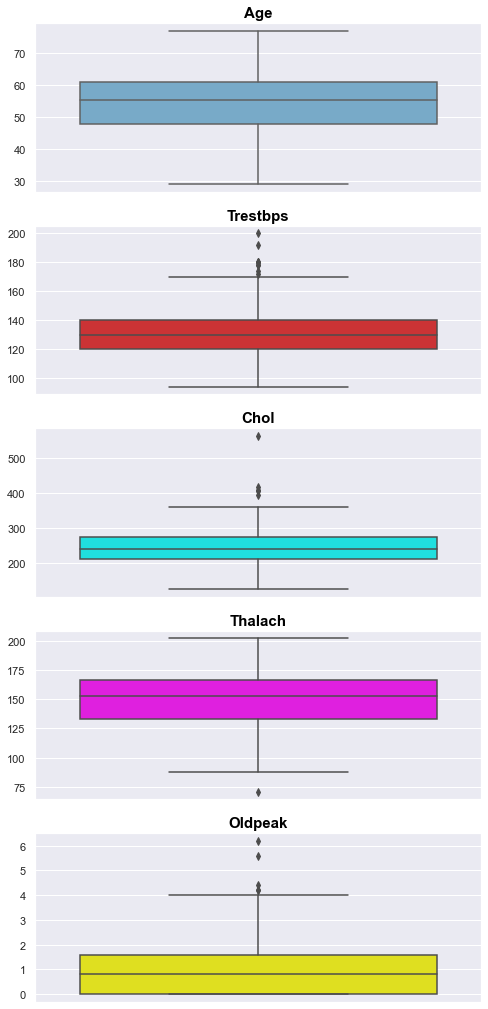

In [272]:
# Title for all box plots
title_all_graphs = "Box Plots for Continuous Features:"
centered_title = title_all_graphs.center(70)
underline = "_______________________________"
centered_underline = underline.center(70)
print(centered_title)
print(centered_underline)

# Bar plots for the continuous features
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5,
                                                   ncols = 1,
                                                   figsize = (8, 18))

# Age
sns.boxplot(ax = ax0, y = df['age'], palette = 'Blues')
ax0.set_title('Age', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax0.set_xlabel("")
ax0.set_ylabel("")

# Trestbps
sns.boxplot(ax = ax1, y = df['trestbps'], palette = 'Set1')
ax1.set_title('Trestbps', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax1.set_xlabel("")
ax1.set_ylabel("")

# Chol
sns.boxplot(ax = ax2, y = df['chol'], color = 'cyan')
ax2.set_title('Chol', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax2.set_xlabel("")
ax2.set_ylabel("")

# Thalachh
sns.boxplot(ax = ax3, y = df['thalach'], color = 'magenta')
ax3.set_title('Thalach', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax3.set_xlabel("")
ax3.set_ylabel("")

# Oldpeak
sns.boxplot(ax = ax4, y = df['oldpeak'], color = 'yellow')
ax4.set_title('Oldpeak', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': '000000'})
ax4.set_xlabel("")
ax4.set_ylabel("");

#### 8.2 Bivariate Data Visualizations

##### Distribution of Continuous Features vs. Target Variable

            Distribution of Continuous Features vs. Target Variable             
                        _______________________________                         


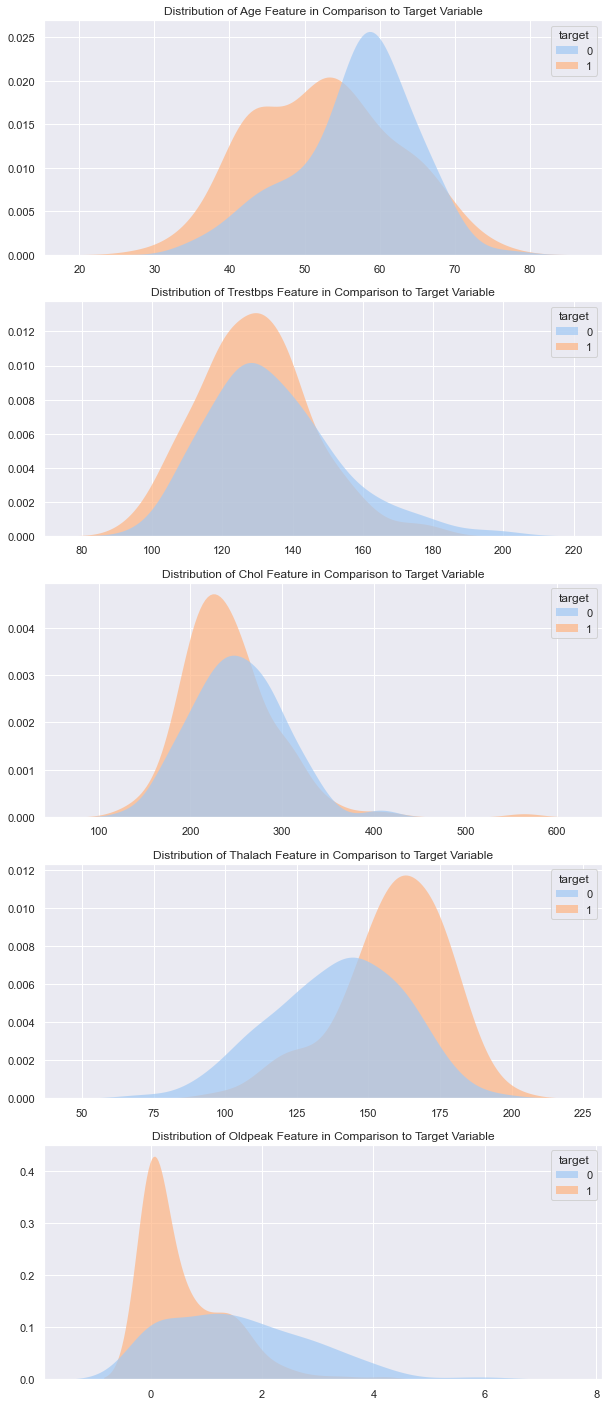

In [65]:
# Title for all density plots
title_all_graphs = "Distribution of Continuous Features vs. Target Variable"
centered_title = title_all_graphs.center(80)
underline = "_______________________________"
centered_underline = underline.center(80)
print(centered_title)
print(centered_underline)

# Distribution plots for the continuous features
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5,
                                              ncols = 1,
                                              figsize = (10, 25))

# Age
sns.kdeplot(ax = ax0, data = df, x = 'age', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax0.set_title("Distribution of Age Feature in Comparison to Target Variable")
ax0.set_xlabel("")
ax0.set_ylabel("")

# Trestbps
sns.kdeplot(ax = ax1, data = df, x = 'trestbps', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax1.set_title("Distribution of Trestbps Feature in Comparison to Target Variable")
ax1.set_xlabel("")
ax1.set_ylabel("")


# Chol
sns.kdeplot(ax = ax2, data = df, x = 'chol', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title("Distribution of Chol Feature in Comparison to Target Variable")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Thalach
sns.kdeplot(ax = ax3, data = df, x = 'thalach', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax3.set_title("Distribution of Thalach Feature in Comparison to Target Variable")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Oldpeak
sns.kdeplot(ax = ax4, data = df, x = 'oldpeak', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax4.set_title("Distribution of Oldpeak Feature in Comparison to Target Variable")
ax4.set_xlabel("")
ax4.set_ylabel("");

#### 8.3 Correlation Analysis

##### Correlation Matrix of Continuous Features

In [67]:
corr_cont_matrix = df[continuous_cols].corr()
corr_cont_matrix

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trestbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalach,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


                                          Correlation Matrix of Continuous Features                                          
                                               _______________________________                                               


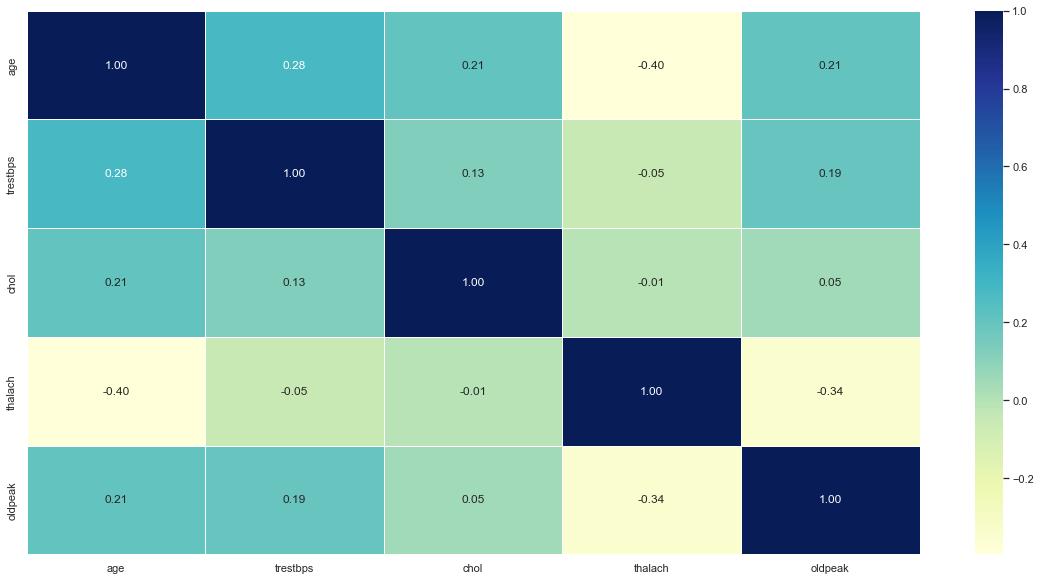

In [75]:
# Visualizing correlation matrix
# Title for Correlation Plot
title_all_graphs = "Correlation Matrix of Continuous Features"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plotting Correlation Matrix
plt.figure(figsize = (20, 10))
ax = sns.heatmap(corr_cont_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = '.2f',
                 cmap = 'YlGnBu');

##### Heatmap of All Features

                                  Heatmap of Heart Disease Dataset                                  
                                  _______________________________                                   


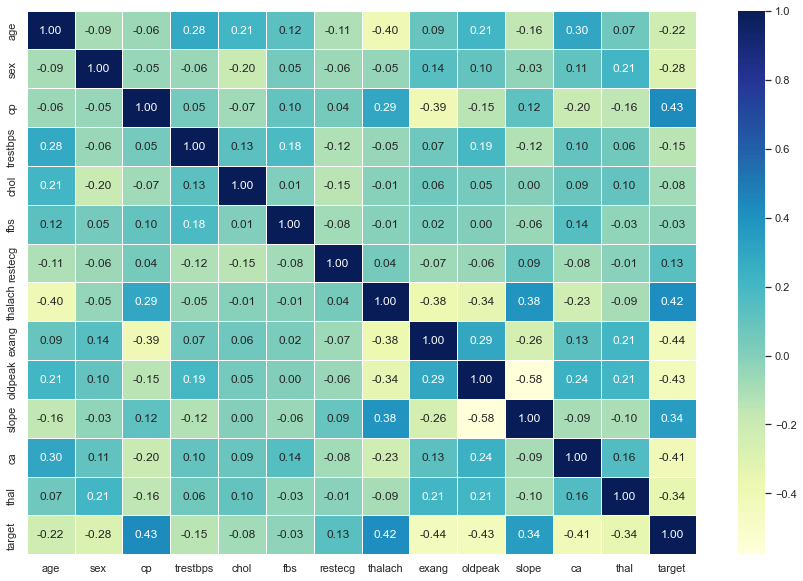

In [82]:
# Title for Correlation Plot
title_all_graphs = "Heatmap of Heart Disease Dataset"
centered_title = title_all_graphs.center(100)
underline = "_______________________________"
centered_underline = underline.center(100)
print(centered_title)
print(centered_underline)

# Correlation of all features
corr_matrix = df.corr()

# Plotting Heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix,
           annot = True,
           linewidths = 0.5,
           fmt = ".2f",
           cmap = "YlGnBu");

**Inference from Correlation Analysis:**
- Generally speaking, none of the features are strongly correlated with each other in the negative or positive direction.
- All features have correlation coefficients between -0.6 or 0.6 (not inclusive) indicating that none of the features or targets have strong correlations; rather relatively weak correlations between each other. 

### 9. Conclusions from EDA
1. There are no NaN values and onyl 1 duplicate value in the dataset.
2. The data consists of more than twice the number of male patients than female patients.
3. There is no apparent linear correlation in the negative or postive direction according the correlation matrix.
4. Intuitively, the elderly might have a higher chance of getting heart attack, but most heart disease patients appear to be middle aged according to the data.
5. According to the distribution plot of the `thalach` feature and `target` variable, patients with higher maximum heart rate have a higher chance of getting heart disease.
6. According to the distribution plot of the `odlpeak` feature and `target` variable, patients with lower ST depression induced by exercise relative to rest have a higher chance of getting heart disease.

### 10. Data Preprocessing

#### 10.1 Defining the Features and Target

In [98]:
# Looking at the dataframe again
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
# Split the data into x and y
X = df.drop("target", axis = 1)

y = df.target.values

In [100]:
# Independent variables (features)
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [104]:
# Target variable
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### 10.2 Training and Test Split

In [107]:
# Set random seed for consistency and reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variables
                                                    test_size = 0.2) # percentage of data to use for test set

# Sizes of test & training sets
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is: ", X_test.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is: ", y_test.shape)

The shape of X_train is: (241, 13)
The shape of X_test is:  (61, 13)
The shape of y_train is: (241,)
The shape of y_test is:  (61,)


### 11. Modelling

#### 11.1 Model Choices
Now, that the data has been prepared for modelling, we can start to fit the models. We will be using the following models, and their results will be compared:
1. Logistic Regression - `LogisticRegression()`
2. K-Nearest Neighbors - `KNeighboursClassifier()`
3. Support Vector Classification - `SVC()`
4. Decision Tree Classifier - `DecisionTreeClassifier()`
5. RandomForest - `RandomForestClassifier()`
6. AdaBoost Classifier - 
7. Gradient Bosst Classifier -

#### Why these?
We selected these models through the help of the [Scikit-Learn algorithm cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). Since this is a binary classification problem with 303 samples that are not text data, the documentation suggests the usage of: 
* Linear SVC
* KNeighbors Classifier
* SVC
* Ensemble Classifiers

In [110]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "Gradient Boost Classifier": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data
    X_test: testing data
    y_train: labels associated with training data
    y_test: labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Lopp through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [112]:
# Obtain scores for models
model_scores = fit_and_score(models = models,
                         X_train = X_train,
                         X_test = X_test,
                         y_train = y_train,
                         y_test = y_test)
model_scores

{'KNN': 0.6557377049180327,
 'SVC': 0.7049180327868853,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8688524590163934,
 'Decision Tree': 0.7868852459016393,
 'AdaBoost': 0.7868852459016393,
 'Gradient Boost Classifier': 0.8524590163934426}

#### 11.2 Model Comparison

In [113]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare

,KNN,SVC,Logistic Regression,Random Forest,Decision Tree,AdaBoost,Gradient Boost Classifier
Accuracy,0.655738,0.704918,0.852459,0.868852,0.786885,0.786885,0.852459


                                                      Model Comparison:                                                      
                                               _______________________________                                               


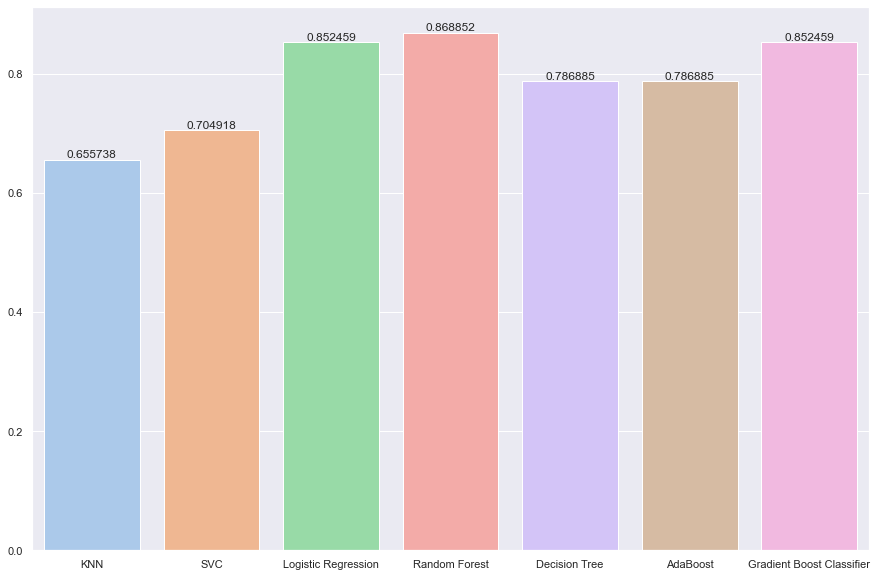

In [236]:
# Visualizing model results
# Title for Model Comparison Bar Plot
title_all_graphs = "Model Comparison:"
centered_title = title_all_graphs.center(125)
underline = "_______________________________"
centered_underline = underline.center(125)
print(centered_title)
print(centered_underline)

# Plot model results
plt.figure(figsize = (15, 10))
model_plot = sns.barplot(data = model_compare)
model_plot.bar_label(model_plot.containers[0]);

### 12. Hyperparameter Tuning and Cross-Validation
To test different hyperparameters, we could use a **validation set**, but since there isn't much data in this dataset, the data will be **cross-validated**.

Model improvement framework:
1. Tune model hyperparameters, see which performs best.
2. Perform cross-validation.
3. Plot ROC curves.
4. Make a confusion matrix.
5. Get precision, recall and F1-score metrics
6. Find the mode important model features

#### 12.1 Tuning KNeighborsClassifier by Hand
To get the most out of the K-Nearest Neighbors (KNN algorithm), the main hyperparameter, the number of neighbors, can be tuned to get better results. The default is 5 (`n_neighbors = 5`).

In this case, I will check to see if there a value between 1 and 20 (less than or greater than the default 5) that enhances the performance of the base KNN model.

In [139]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
KNN = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    KNN.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    KNN.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(KNN.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(KNN.score(X_test, y_test))
    
# Calculate max score
max_score = round(max(test_scores) * 100, 2)
max_score

70.49

                           K-Nearest Neighbors Model Results with Different Neighbor Values:                            
                                _______________________________________________________                                 
                                       Maximum KNN score on the test data: 70.49%                                       


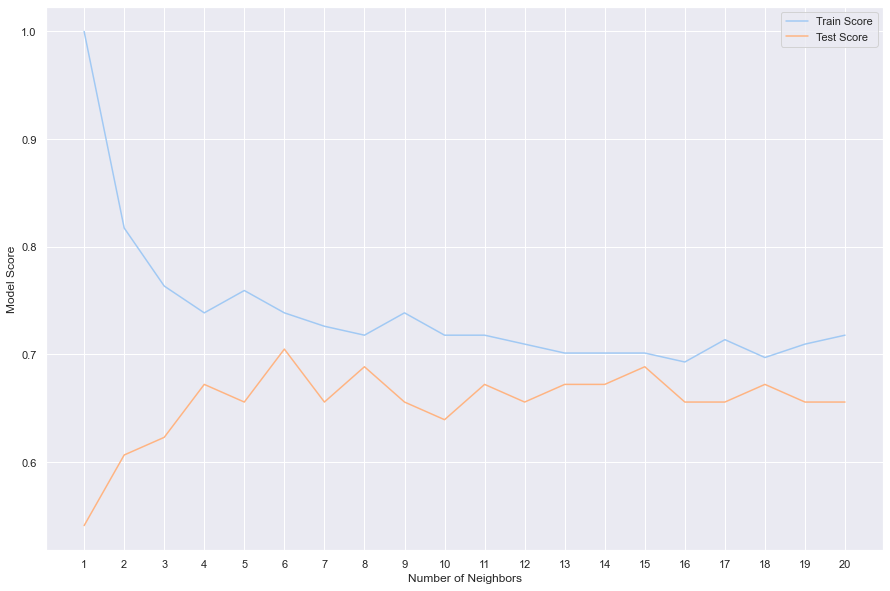

In [156]:
# Visualizing KNN scores different # of neighbors
# Title for KNN score plot
title_all_graphs = "K-Nearest Neighbors Model Results with Different Neighbor Values:"
centered_title = title_all_graphs.center(120)
underline = "_______________________________________________________"
centered_underline = underline.center(120)
knn_best_score = "Maximum KNN score on the test data: " + str(max_score) + "%"
centered_knn_score = knn_best_score.center(120)
print(centered_title)
print(centered_underline)
print(centered_knn_score)

# Plotting the Results of Tuned KNN Models
plt.figure(figsize = (15, 10))
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend();

Looking at the graph, `n_neighbors = 6` seems best.

Despite tuning the number neighbors hyperparameter, the `KNN`'s model performance didn't get near what `LogisticRegression`, `GrandientBoostingClassifier`, or the `RandomForestClassifier`did.

For this reason, `KNN` will be dicarded, and improving the other 3 models will the goal.

Let's try tuning `LogisticRegression`, `RandomForestClassifier`, and `GradientBoostingClassifier` with `RandomizedSearchCV`.

#### 12.2 Tuning models with `RandomizedSearchCV`

In [175]:
# Different LogisticRegression() hyperparameters
log_reg_grid = {'C': np.logspace(-4, 50, 80),
                "solver": ["liblinear"]}

# Different RandomForestClassifier() hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(5, 20, 2),
           "min_samples_leaf": np.arange(5, 15, 2)}

# Different GradientBoostingClassifier() hyperparameters
gbc_grid = {"n_estimators": [5, 50, 250, 500],
            "max_depth": [5, 6, 7, 8],
            "learning_rate":[0.01,0.1,1,10,100]}

Now let's use `RandomizedSearchCV` to try and tune the `LogisticRegression()` model.

Through passing different hyperparameters from `log_red_grid` as well as setting `n_iter = 20`. This means 20 different combinations of hyperparameters from `log_reg_grid` will be tested, and the best ones will be saved.

In [161]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression()
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [162]:
# Find the best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 3.2086999973704436e+16}

In [163]:
# Evaluate the randomized search for LogisticRegression()
rs_log_reg.score(X_test, y_test)

0.819672131147541

Now we've tuned `LogisticRegression()` using `RandomizedSearchSearchCV`, we'll do the same for `RandomForestClassifier()`.

In [177]:
# Setup random seed
np.random.seed(10)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [178]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 360,
 'min_samples_split': 9,
 'min_samples_leaf': 11,
 'max_depth': None}

In [167]:
# Evaluate the randomized search for RandomForestClassifier()
rs_rf.score(X_test, y_test)

0.8688524590163934

Finally, we'll tune `GradientBoostingClassifier()` with `RandomizedSearchCV`.

In [179]:
# Setup random seed
np.random.seed(40)

# Setup random hyperparameter search for GradientBoostingClassifier()
rs_gbc = RandomizedSearchCV(GradientBoostingClassifier(),
                            param_distributions = gbc_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

# Fit random hyperparameter
rs_gbc.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [180]:
# Find the best parameters
rs_gbc.best_params_

{'n_estimators': 250, 'max_depth': 6, 'learning_rate': 1}

In [183]:
# Evalulate the randomized search for GradientBoostingClassifier()
rs_gbc.score(X_test, y_test)

0.8524590163934426

**Conclusions from RandomizedSearchCV**:
* `RandomizedSearchCV()` provided a worse score (Accuracy: 0.819672131147541) with the specified hyperparameters for `LogisticRegression()` than the base model (Accuracy: 0.85429).


* `RandomizedSearchCV()` provided the same score (Accuracy: 0.8688524590163934) as the base model with the speficied hyperparameters for `RandomForestClassifier()`. 


* `RandomizedSearchCV()` provided the same score (Accuracy: 0.8524590163934426) as the base model with the speficied hyperparameters for `GradientBoostingClassifier()`.


#### 12.3 Tuning models with **GridSearchCV**
We will continue to improve our `RandomForestClassifier()` model to ensure best predictions with `GridSearchCV` as it continues to provides the best results over the other models. 

In [186]:
# Different RandomForestClassifier() hyperparameters
rf_clf_grid = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

# Setup random hyperparameter search for RandomForestClassifier
gs_rf_clf = GridSearchCV(RandomForestClassifier(),
                         param_grid = rf_clf_grid,
                         cv = 5,
                         verbose = True)

# Fit grid hyperparameter search model
gs_rf_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [187]:
# Check the best parameters
gs_rf_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [189]:
# Evaluate the model
gs_rf_clf.score(X_test, y_test)

0.8524590163934426

In this case, we get a slightly lower performance with the best parameters from the hyperparameter grid on the `RandomForestClassifier()` model with `GridSearchCV`. However, there were only 60 different hyperparameter combinations. More combinations could be used, but this would take too much time on our devices, and the results of the `RandomForestClassifier()` model are quite promising. 

### 13. Evaluation
Let's assess metrics beyond just accuracy.

Metrics:
* ROC Curve and AUC Score - `plot_roc_curve()`
* Confusion Matrix - `confusion_matrix()`
* Precision - `precision_score()`
* Recall - `recall_score()`
* F1-Score - `f1_score()`

Firstly, predictions on the test data will have to be made.
#### 13.1 Predictions

In [191]:
# Make predictions on test data
y_preds = gs_rf_clf.predict(X_test)

In [192]:
# Check predictions
y_preds

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [193]:
# Check test set
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

With these prediction values, we can find the metrics we'd like to see.

#### 13.2 ROC Curve and AUC Scores
Understanding the false-postives or false-negatives for heart-disease patients:
> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

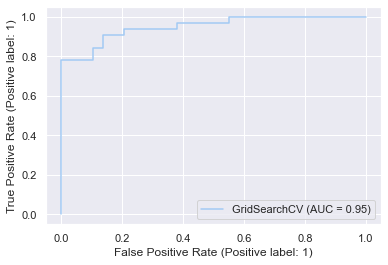

In [194]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_rf_clf, X_test, y_test);

The model performs far better than guessing, would would simply be a linear line crossing from bottom left corner at the origin to the top right corner, AUC = 0.5. The model has an AUC score 0.95, which less than an AUC score of 1.0, so there the model can still be tuned more.

#### 13.3 Confusion Matrix

In [195]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 5 27]]


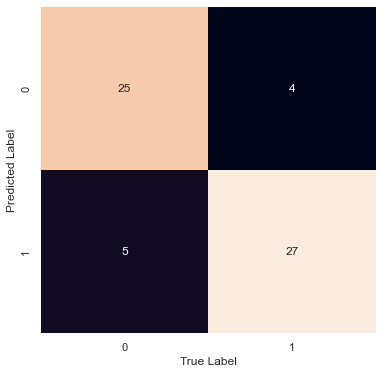

In [199]:
# Visualizing confusion matrix
def plot_conf_mat(y_test, _preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize = (6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True, # Annotate Boxes
                     cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

**Conclusions from Confusion Matrix:** There are 4 occassions where the model predicted 0 wehn it should've been 1 (false-negative) and 3 occassions where the model predicted 1 instead of 0 (false-positive).

#### 13.4 Classification Report

In [200]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



We have finally achieved some deeper insights on the model, but these metrics were obtained using a single training and test set.

#### 13.5 Cross-Validated Metrics

We'll obtain more precise metrics through cross-validation. This will be done by using the best model (`RandomForestClassifier`) with the best hyperparameters and using `cross_val_score()` along with various `scoring` parameter values.

Checking the best hyperparameters again:

In [201]:
# Best parameters through hyperparameter tuning on RandomForestClassifier()
gs_rf_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [203]:
# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = RandomForestClassifier(max_depth = None, 
                            max_features = 'sqrt', 
                            min_samples_leaf = 2, 
                            min_samples_split = 6, 
                            n_estimators = 500)

Now that we have an instantiated classifier, let's find some cross-validated metrics.

In [205]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5, # 5-fold cross-validation
                         scoring = "accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8       , 0.8       , 0.78333333])

Since there are 5 metriccs, we'll take the average.

In [206]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8209289617486337

The will done for the other classification metrics.

In [208]:
# Average cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv = 5, # 5-fold cross-validation
                                       scoring = "precision")) # precision as scoring
cv_precision

0.8390789117005036

In [209]:
# Average cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv = 5, # 5-fold cross-validation
                                    scoring = "recall")) # recall as scoring
cv_recall

0.8537878787878789

In [210]:
# Average Cross-validated F1-Score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv = 5, # 5-fold cross-validation
                                scoring = "f1")) # f1 as scoring
cv_f1

0.8396657157846417

In [217]:
# Visualizng cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index = [0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.820929,0.839079,0.853788,0.839666


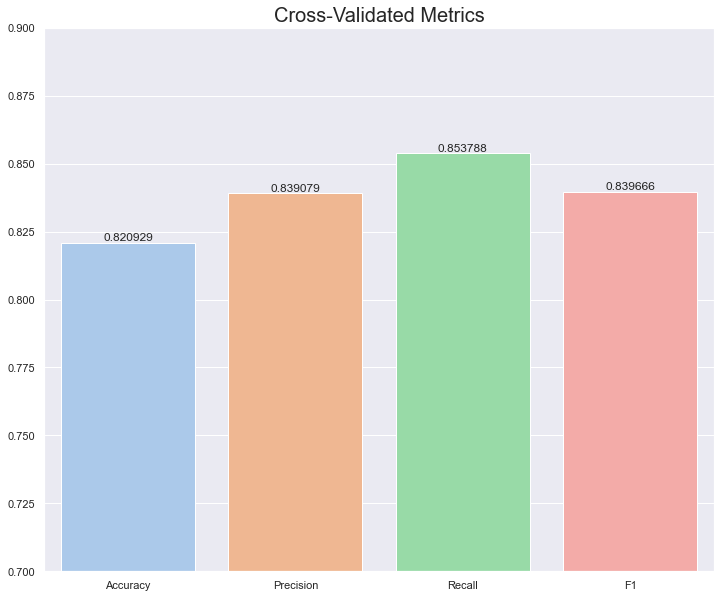

In [246]:
plt.figure(figsize = (12, 10))
cv_metrics_plot = sns.barplot(data = cv_metrics)
cv_metrics_plot.set_title("Cross-Validated Metrics", fontsize = 20)
cv_metrics_plot.bar_label(cv_metrics_plot.containers[0]);
plt.ylim(0.7, 0.9);

### 14. Feature Importance

Which features contribute most to a model predicting whether someone has heart disease or not?

In [247]:
# Fit an instance of RandomForestClassifier()
clf.fit(X_train, y_train);

In [251]:
# Check coef_
clf.feature_importances_

array([0.07684863, 0.04327249, 0.11705177, 0.05663304, 0.06053482,
       0.00611443, 0.0141535 , 0.10172342, 0.06336734, 0.11960584,
       0.05411241, 0.14851812, 0.13806417])

In [257]:
# Match features to columns in dataframe
feature_importances_s = pd.Series(clf.feature_importances_, index = X.columns)

In [262]:
# Converting series to dataframe
feature_importances_df = feature_importances_s.to_frame('value').T
feature_importances_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
value,0.076849,0.043272,0.117052,0.056633,0.060535,0.006114,0.014154,0.101723,0.063367,0.119606,0.054112,0.148518,0.138064


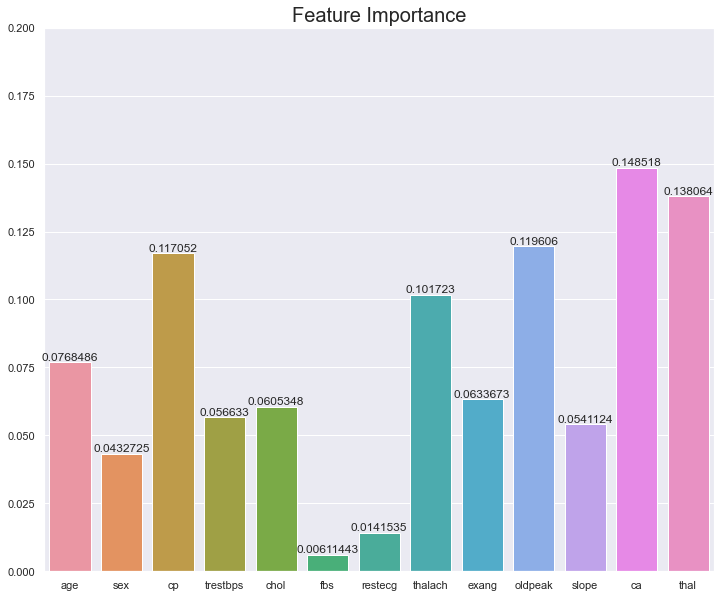

In [265]:
# Visualize feature importance
plt.figure(figsize = (12, 10))
feature_importance_plot = sns.barplot(data = feature_importances_df)
feature_importance_plot.set_title("Feature Importance", fontsize = 20)
feature_importance_plot.bar_label(feature_importance_plot.containers[0]);
plt.ylim(0, 0.2);

**Conclusions from Feature Importance:**
* `ca`, `thal`, `oldpeak`, `cp`, `thalach` are the most important features for determining/predicting if a patient has heart disease.


* `fbs` and `restecg` are the least important features for determing/predicting if a patient has heart disease.

### 15. Experimentation

Did the final and best model achieve the desired accuracy from the problem statement?
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue this project.

Since the hgihest accuracy our model achieved was slightly below 90%, the target was not achieved.

Further experimentation will be required, such as testing different models (CatBoost? XGBoost?), trying to tune different hyperparameters, and selecting the most important features for the prediction process. Through these steps, achieving an accuracy closer to or beyond 95% is certainly possible.

### 16. Saving Models
The best model will be saved using the **joblib** library.

In [267]:
from joblib import dump

# Save model to file
dump(clf, filename = "gs_random_forest_model_heart_disease_classification.joblib")

['gs_random_forest_model_heart_disease_classification.joblib']